<h1> Predicting fair Transaction Prices of Real-Estate Properties </h1>

The project involves analysis of data containing 1883 observations of public records for properties in the county where Real Estate operates and predicting the fair transaction prices of houses based on characteristics such as year, location, neighborhood, and schools. The goal is to come up with a predictive model with a MAE of < $70,000.

<h3> Importing the required libraries for this project. </h3>

In [135]:
from __future__ import print_function  # Compatability with Python 3
print( 'Print function ready to serve.' )

# For os.chdir() to change directory
import os

# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Matplotlib for visualization
from matplotlib import pyplot as plt

# display plots in the notebook
%matplotlib inline 

# Seaborn for easier visualization
import seaborn as sns

# Function for splitting training and test set
from sklearn.model_selection import train_test_split

# Function for creating model pipelines
from sklearn.pipeline import make_pipeline

# For standardization
from sklearn.preprocessing import StandardScaler

# Import Elastic Net, Ridge Regression, and Lasso Regression
from sklearn.linear_model import ElasticNet, Ridge, Lasso

# Import Random Forest and Gradient Boosted Trees
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Helper for cross-validation
from sklearn.model_selection import GridSearchCV

# Import r2_score and mean_absolute_error functions
from sklearn.metrics import r2_score, mean_absolute_error

# Save Python objects to disk
import pickle

Print function ready to serve.


<h3>1. Load Dataset </h3>

In [6]:
os.getcwd()
os.chdir('/Users/raghav/Desktop/Data Science Specialization Coursera/Project 2 Workbook Bundle/project_files')
df = pd.read_csv('real_estate_data.csv')

<h3>2. Basic Exploratory Analysis </h3>

In [7]:
# Dataframe dimensions
df.shape

(1883, 26)

The dataset has 1883 rows as expected and 26 columns. Let us see what those columns are

In [9]:
#Column datatypes
df.dtypes

tx_price                int64
beds                    int64
baths                   int64
sqft                    int64
year_built              int64
lot_size                int64
property_type          object
exterior_walls         object
roof                   object
basement              float64
restaurants             int64
groceries               int64
nightlife               int64
cafes                   int64
shopping                int64
arts_entertainment      int64
beauty_spas             int64
active_life             int64
median_age            float64
married               float64
college_grad          float64
property_tax          float64
insurance             float64
median_school         float64
num_schools           float64
tx_year                 int64
dtype: object

The dataset has columns that are numbers, decimals, and categorical. The first field <code>tx_price</code> is what we might need to predict. Let us examine the records to see if there is anything unusual about them, including missing values, or outliers.

In [10]:
# See first few records
df.head()

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
0,295850,1,1,584,2013,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,107,9,30,19,89,6,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013
1,216500,1,1,612,1965,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,1.0,105,15,6,13,87,2,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006
2,279900,1,1,615,1963,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,183,13,31,30,101,10,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012
3,379900,1,1,618,2000,33541,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,198,9,38,25,127,11,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005
4,340000,1,1,634,1992,0,Apartment / Condo / Townhouse,Brick,NaN,NaN,149,7,22,20,83,10,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002


This shows that certain values in fields such as <code>roof</code> and <code>basement</code> are missing. Let us also see the last few records. 

In [11]:
df.tail(10)

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
1873,569000,5,5,7165,1991,43995,Single-Family,Brick,Wood Shake/ Shingles,1.0,9,1,1,1,11,1,3,6,49.0,82.0,68.0,1024.0,312.0,8.0,2.0,1994
1874,370000,5,5,7578,2008,87120,Single-Family,Siding (Alum/Vinyl),Composition Shingle,1.0,0,0,0,0,1,0,0,2,47.0,92.0,84.0,1045.0,318.0,9.0,3.0,2004
1875,235000,5,5,7594,2006,36154,Single-Family,Brick,Composition Shingle,1.0,8,1,0,1,5,4,5,2,52.0,85.0,57.0,1061.0,323.0,5.5,2.0,2006
1876,760000,5,5,7842,2003,436035,Single-Family,Combination,NaN,1.0,0,0,0,0,0,0,0,0,48.0,76.0,62.0,881.0,249.0,7.5,2.0,2008
1877,555000,5,5,8450,2004,91911,Single-Family,Other,Composition Shingle,1.0,7,2,1,1,4,0,3,3,35.0,91.0,85.0,1966.0,599.0,10.0,3.0,2003
1878,385000,5,6,6381,2004,224334,Single-Family,Stucco,Composition Shingle,1.0,0,0,0,0,3,0,0,1,46.0,76.0,87.0,1250.0,381.0,10.0,3.0,2002
1879,690000,5,6,6501,1956,23086,Single-Family,Brick,Composition Shingle,1.0,45,7,5,7,41,3,61,11,42.0,73.0,61.0,1553.0,473.0,9.0,3.0,2015
1880,600000,5,6,7064,1995,217800,Single-Family,Metal,Composition Shingle,1.0,5,1,1,1,8,2,1,2,43.0,87.0,66.0,942.0,287.0,8.0,1.0,1999
1881,759900,5,6,7500,2006,8886,Single-Family,Siding (Alum/Vinyl),Asphalt,1.0,18,2,4,0,5,1,8,6,43.0,61.0,51.0,803.0,245.0,5.0,2.0,2009
1882,735000,5,6,7515,1958,10497,Single-Family,Brick,Composition Shingle,1.0,0,0,0,1,2,2,0,5,37.0,80.0,86.0,1459.0,444.0,9.0,3.0,2015


Again, one of the <code>roof</code> types is missing, but there is nothing beyond that which immediately jumps out. Let us look at the summaries of all numerical variables

<h3>3. Distribution of Numerical Features </h3>

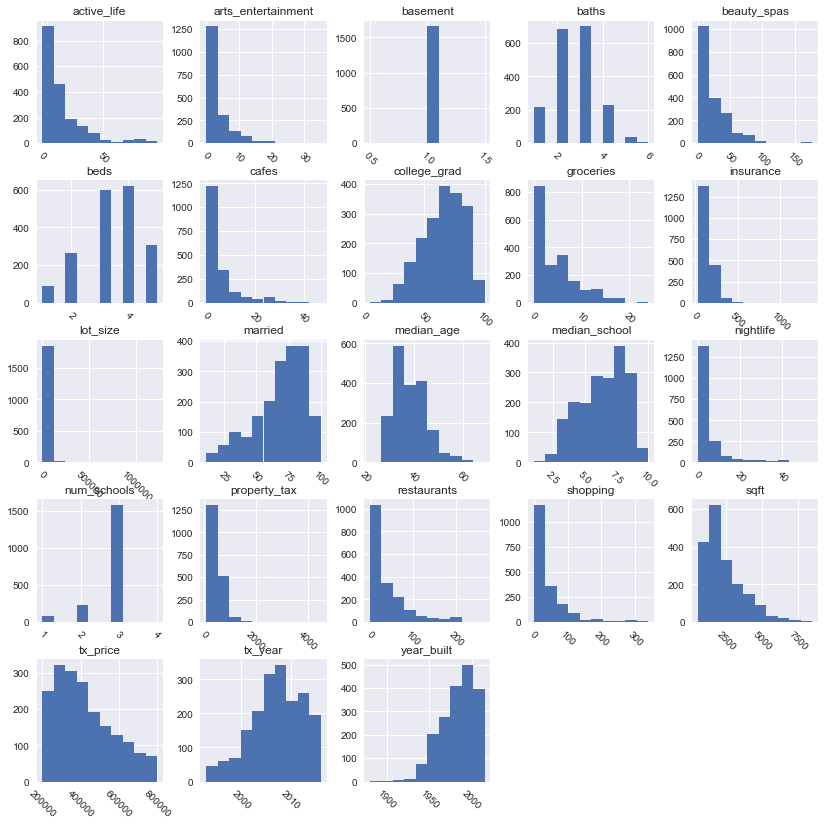

In [23]:
#Plot histograms
df.hist(figsize=(14,14), xrot=-45)

#Clear the text "residue"
plt.show()

In [12]:
#Summarize numerical features
df.describe()

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
count,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1.883000e+03,1657.0,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000
mean,422839.807754,3.420605,2.579926,2329.398832,1982.963887,1.339262e+04,1.0,40.210303,4.505045,5.074881,5.325013,40.802443,3.394052,23.416888,15.835369,38.601168,69.091875,65.085502,466.777483,140.454063,6.502921,2.793415,2007.111524
std,151462.593276,1.068554,0.945576,1336.991858,20.295945,4.494930e+04,0.0,46.867012,4.491029,8.464668,7.539309,53.539296,4.699787,25.776916,17.667717,6.634110,19.659767,16.953165,231.656645,72.929765,1.996109,0.505358,5.196898
min,200000.000000,1.000000,1.000000,500.000000,1880.000000,0.000000e+00,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,11.000000,5.000000,88.000000,30.000000,1.000000,1.000000,1993.000000
25%,300000.000000,3.000000,2.000000,1345.000000,1970.000000,1.542000e+03,1.0,7.000000,1.000000,0.000000,0.000000,6.000000,0.000000,4.000000,4.000000,33.000000,58.000000,54.000000,320.000000,94.000000,5.000000,3.000000,2004.000000
50%,392000.000000,3.000000,3.000000,1907.000000,1986.000000,6.098000e+03,1.0,23.000000,3.000000,2.000000,3.000000,22.000000,2.000000,15.000000,10.000000,38.000000,73.000000,66.000000,426.000000,125.000000,7.000000,3.000000,2007.000000
75%,525000.000000,4.000000,3.000000,3005.000000,2000.000000,1.176100e+04,1.0,58.000000,7.000000,6.000000,6.000000,51.000000,5.000000,35.000000,21.000000,43.000000,84.000000,78.000000,569.000000,169.000000,8.000000,3.000000,2011.000000
max,800000.000000,5.000000,6.000000,8450.000000,2015.000000,1.220551e+06,1.0,266.000000,24.000000,54.000000,47.000000,340.000000,35.000000,177.000000,94.000000,69.000000,100.000000,100.000000,4508.000000,1374.000000,10.000000,4.000000,2016.000000


<b>Observations</b>:
<ol>
<li> Numeric Values are on different scales. </li>
<li> Nothing else too significant. </li>
</ol>

In [15]:
# Summarize all categorical features
df.describe(include=['object'])

,property_type,exterior_walls,roof
count,1883,1660,1529
unique,2,16,16
top,Single-Family,Brick,Composition Shingle
freq,1080,687,1179


Let us plot bar plot for the <code style="color:steelblue">'exterior_walls'</code> feature.

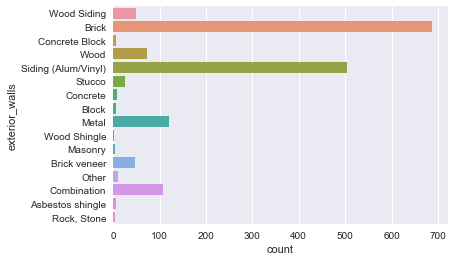

In [16]:
#Bar plot for 'exterior_walls' feature
sns.countplot(y='exterior_walls',data=df)

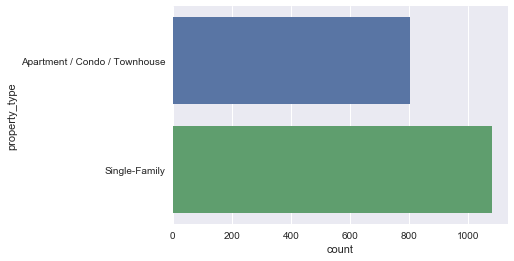

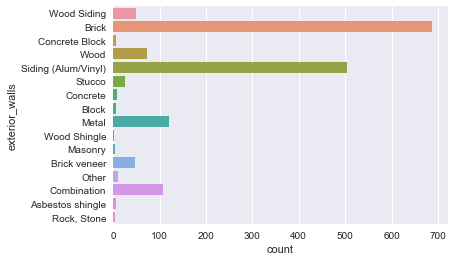

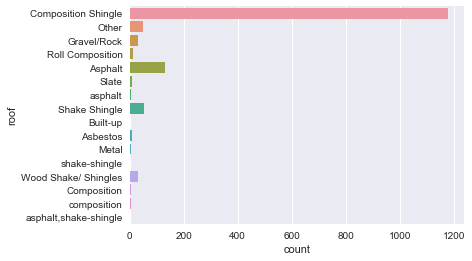

In [18]:
#Bar plot for all features
for feature in df.dtypes[df.dtypes == 'object'].index:
    sns.countplot(y=feature, data=df)
    plt.show()

<b>Observations</b>: 
<ol>
<li> There are many features which suffer from sparsity in both classes. </li>
<li> There are features which could be merged into one. Ex: Concrete block and block, Wood shingle and asbestos shingle, Concrete and rock stone and concrete block, etc. on exterior_walls </li>
<li> Features which could be merged in roof are 'Composition' and 'composition', 'asphalt' and 'asphalt, shake-shingle', 'shake-shingle', and 'Asphalt'.     
</ol>

<h3>4. Segmentations </h3>

Let us now create some segmentations. Let us cut the tx_price feature by each of the categorical types to see if there is an obvious relationship.

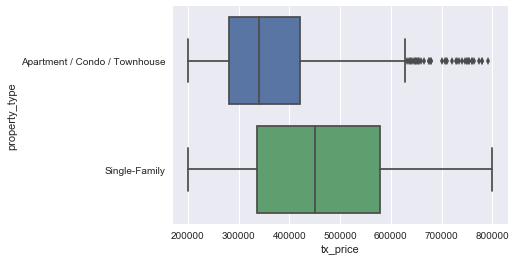

In [19]:
# Segment tx_price by property_type and plot distributions
sns.boxplot(y='property_type',x='tx_price', data=df)

On an average, we see single family homes are more expensive compared to apartments/condos/townhouses.

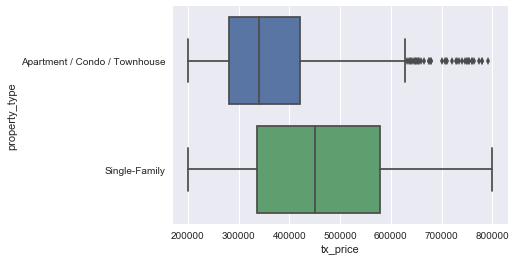

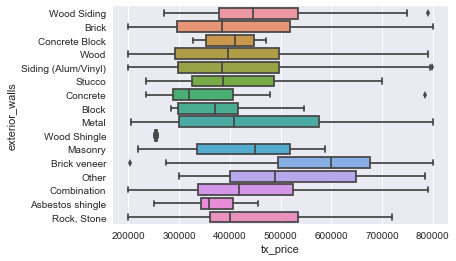

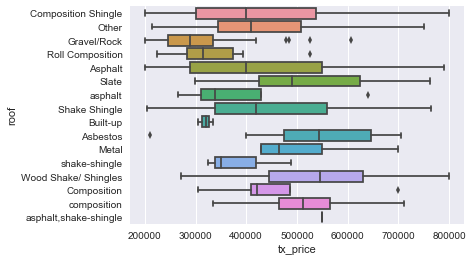

In [20]:
for feature in df.dtypes[df.dtypes == 'object'].index:
    sns.boxplot(y=feature, x='tx_price', data=df)
    plt.show()

The other two are not very interesting. Select <code style="color:steelblue">'property_type'</code> and see average value of each feature within each class.

In [21]:
# Segment by property_type and display the means within each class
df.groupby('property_type').mean()

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
property_type,,,,,,,,,,,,,,,,,,,,,,,
Apartment / Condo / Townhouse,366614.034869,2.601494,2.200498,1513.727273,1988.936488,3944.239103,1.0,58.418431,5.919054,7.855542,8.037360,57.631382,4.840598,32.087173,22.410959,37.199253,57.534247,66.372354,346.261519,105.652553,6.382316,2.831880,2007.941469
Single-Family,464644.711111,4.029630,2.862037,2935.865741,1978.523148,20417.666667,1.0,26.672222,3.453704,3.007407,3.308333,28.289815,2.318519,16.970370,10.946296,39.643519,77.685185,64.128704,556.383333,166.329630,6.592593,2.764815,2006.494444


Let's create more segmentations using 'property_type'. First, segment 'sqft' by 'property_type' and plot the boxplots.

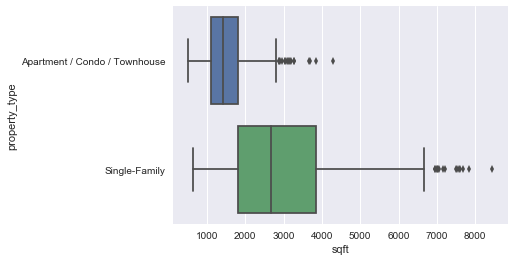

In [25]:
sns.boxplot(y='property_type',x='sqft',data=df)

On an average, we see that Single-family homes are larger and shows greater variance in sizes. This makes sense intuitively.

Let's look at the mean and standard deviations of a number of other variables segmented by property_type:

In [29]:
df.groupby('property_type').agg([np.mean,np.std])

tx_price                     beds  \
                                        mean            std      mean   
property_type                                                           
Apartment / Condo / Townhouse  366614.034869  121784.490486  2.601494   
Single-Family                  464644.711111  157758.739013  4.029630   

                                            baths                   sqft  \
                                    std      mean       std         mean   
property_type                                                              
Apartment / Condo / Townhouse  0.810220  2.200498  0.815009  1513.727273   
Single-Family                  0.795639  2.862037  0.937551  2935.865741   

                                             year_built             \
                                       std         mean        std   
property_type                                                        
Apartment / Condo / Townhouse   556.286650  1988.936488  15.513640   
Single-Family                  1422.871169  1978.523148  22.210582   

                                   lot_size               basement       \
                                       mean           std     mean  std   
property_type                                                             
Apartment / Condo / Townhouse   3944.239103  44284.168767      1.0  0.0   
Single-Family                  20417.666667  44165.529302      1.0  0.0   

                              restaurants            groceries            \
                                     mean        std      mean       std   
property_type                                                              
Apartment / Condo / Townhouse   58.418431  54.343594  5.919054  4.645774   
Single-Family                   26.672222  34.726416  3.453704  4.067285   

                              nightlife                cafes            \
                                   mean        std      mean       std   
property_type                                                            
Apartment / Condo / Townhouse  7.855542  10.643816  8.037360  9.077038   
Single-Family                  3.007407   5.543822  3.308333  5.325053   

                                shopping            arts_entertainment  \
                                    mean        std               mean   
property_type                                                            
Apartment / Condo / Townhouse  57.631382  61.852299           4.840598   
Single-Family                  28.289815  42.292313           2.318519   

                                        beauty_spas            active_life  \
                                    std        mean        std        mean   
property_type                                                                
Apartment / Condo / Townhouse  5.234834   32.087173  26.910443   22.410959   
Single-Family                  3.929691   16.970370  22.872112   10.946296   

                                         median_age              married  \
                                     std       mean       std       mean   
property_type                                                              
Apartment / Condo / Townhouse  21.058178  37.199253  6.906584  57.534247   
Single-Family                  12.599296  39.643519  6.225732  77.685185   

                                         college_grad            property_tax  \
                                     std         mean        std         mean   
property_type                                                                   
Apartment / Condo / Townhouse  20.372706    66.372354  17.095874   346.261519   
Single-Family                  13.868205    64.128704  16.790347   556.383333   

                                            insurance             \
                                      std        mean        std   
property_type                                                      
Apartment / Condo / Townhouse  142.292282  105.652553  47

<h3> 5. Correlations </h3>

Let us look at correlations between all the variables

In [30]:
correlations = df.corr()
correlations

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
tx_price,1.000000,0.384046,0.389375,0.469573,0.033138,0.130558,NaN,-0.038027,-0.094314,0.009361,-0.001398,-0.038246,-0.021076,-0.054349,-0.001165,0.126335,0.200494,0.268577,0.535148,0.532947,0.175762,-0.014380,0.108782
beds,0.384046,1.000000,0.644572,0.691039,-0.011844,0.164399,NaN,-0.495834,-0.421412,-0.440844,-0.464289,-0.388670,-0.442168,-0.419832,-0.486957,0.133711,0.643240,-0.082354,0.547643,0.485776,0.137309,-0.124359,-0.174081
baths,0.389375,0.644572,1.000000,0.682060,0.206141,0.132976,NaN,-0.350210,-0.340024,-0.306686,-0.316836,-0.259603,-0.305885,-0.282008,-0.329736,0.095844,0.442225,0.016097,0.525776,0.475430,0.163365,-0.088299,-0.132110
sqft,0.469573,0.691039,0.682060,1.000000,0.254589,0.246016,NaN,-0.353759,-0.371167,-0.281540,-0.300969,-0.275586,-0.293402,-0.310465,-0.332663,0.109811,0.480167,0.065343,0.660264,0.594049,0.220669,-0.102032,-0.236190
year_built,0.033138,-0.011844,0.206141,0.254589,1.000000,0.000068,NaN,-0.106948,-0.222443,-0.080006,-0.102209,-0.121684,-0.195141,-0.163670,-0.134919,-0.237152,0.038208,-0.014204,-0.046504,-0.109521,0.155835,-0.188106,-0.043301
lot_size,0.130558,0.164399,0.132976,0.246016,0.000068,1.000000,NaN,-0.113887,-0.118574,-0.072224,-0.098182,-0.116560,-0.067189,-0.121075,-0.092668,0.099140,0.122028,-0.030725,0.165800,0.146579,0.096551,-0.031535,-0.048207
basement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
restaurants,-0.038027,-0.495834,-0.350210,-0.353759,-0.106948,-0.113887,NaN,1.000000,0.701462,0.926675,0.937616,0.818815,0.726907,0.867829,0.881799,-0.063816,-0.615584,0.214260,-0.100821,-0.019925,-0.068425,0.251171,0.044739
groceries,-0.094314,-0.421412,-0.340024,-0.371167,-0.222443,-0.118574,NaN,0.701462,1.000000,0.565003,0.602857,0.526356,0.502837,0.626850,0.574532,-0.022377,-0.508793,-0.006025,-0.159506,-0.093974,-0.354553,0.272856,0.115674
nightlife,0.009361,-0.440844,-0.306686,-0.281540,-0.080006,-0.072224,NaN,0.926675,0.565003,1.000000,0.923901,0.743321,0.703038,0.777461,0.858836,-0.028611,-0.568811,0.253717,-0.054386,0.024551,-0.036948,0.196399,0.027495


Let us visualize the correlations using a heatmap grid to make it easier to comprehend:

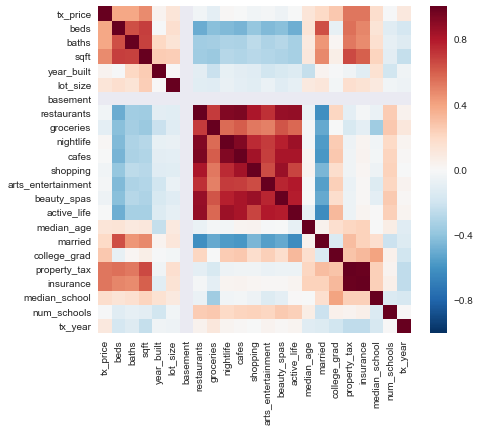

In [31]:
# Make the figsize 7 x 6
plt.figure(figsize=(7,6))

# Plot heatmap of correlations
sns.heatmap(correlations)

Changing background to white so that 0 correlation will show up as white: 

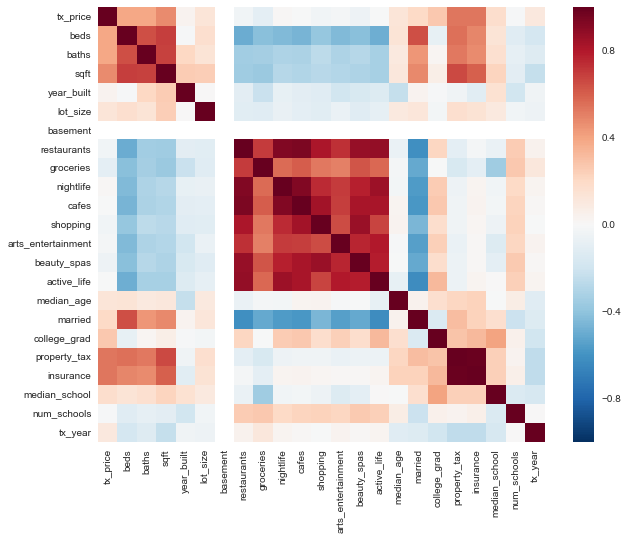

In [34]:
sns.set_style("white")

# Make the figsize 10 x 8
plt.figure(figsize=(10,8))

# Plot heatmap of correlations
sns.heatmap(correlations)

Great! all the basement cells are now white!

Now, displaying the correlation values in each cell.

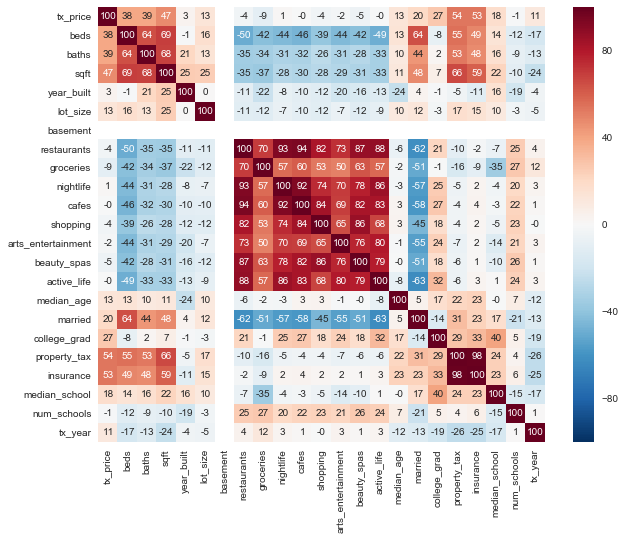

In [35]:
# Make the figsize 10 x 8
plt.figure(figsize=(10,8))

# Plot heatmap of annotated correlations
# multiply correlations by 100 to display them in a cleaner way; annot set to true will show them on the grid, 
# fmt is to format the annotations to a whole number
sns.heatmap(correlations*100, annot=True, fmt='.0f')

Generating a mask for the top triangle as it is redundant...

In [36]:
# Generate a mask for the upper triangle
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

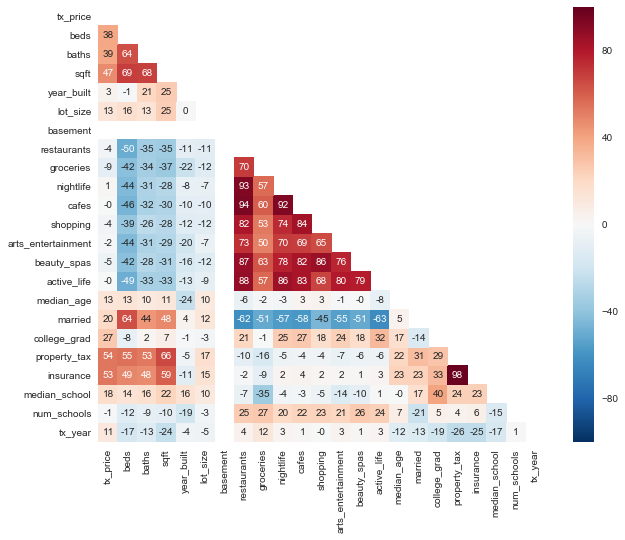

In [37]:
# Make the figsize 10 x 8
plt.figure(figsize=(10,8))

# Plot heatmap of correlations
sns.heatmap(correlations*100, annot=True, fmt='.0f', mask=mask)

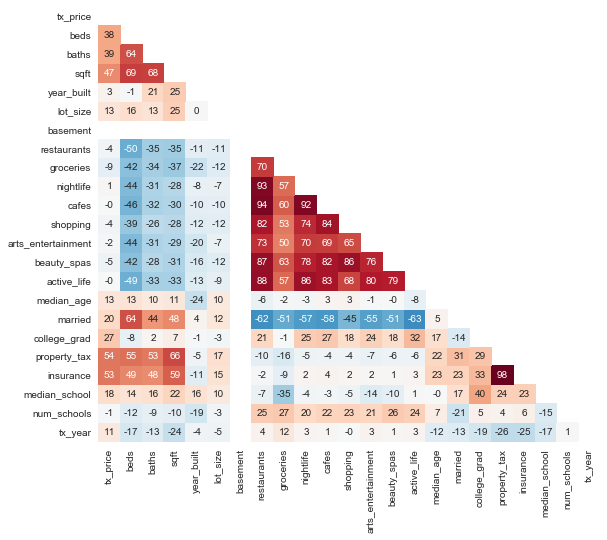

In [39]:
# Removing the side bar and adjusting graph size
plt.figure(figsize=(9,8))

# Plot heatmap of correlations
sns.heatmap(correlations*100,annot=True,mask=mask,fmt='.0f',cbar=False)

<h2> Data Cleaning </h2>

<h3> Dropping unwanted observations (if any) </h3>

In [40]:
df = df.drop_duplicates()
print(df.shape)

(1883, 26)


<h3> Fix structural errors </h3>


basement was problematic, let's fix that...

In [41]:
# Display unique values of basement
df.basement.unique()

array([ nan,   1.])

Filling missing 'basement' values with the value 0 to turn 'basement' into a true indicator variable.

In [42]:
# Missing basement values should be 0
df['basement'] = df.basement.fillna(0)

Confirm that we have a true indicator variable:

In [43]:
# Display unique values of 'basement'
df.basement.unique()

array([ 0.,  1.])

Great! Next, fixing the typos and inconsistent capitalizations in the 'roof' variable

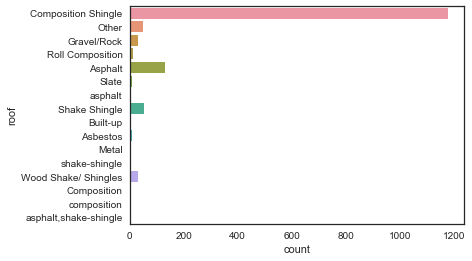

In [44]:
# Class distributions for 'roof'
sns.countplot(y='roof',data=df)

Make these changes:
* <code style="color:crimson">'composition'</code> should be <code style="color:crimson">'Composition'</code>
* <code style="color:crimson">'asphalt'</code> should be <code style="color:crimson">'Asphalt'</code>
* <code style="color:crimson">'shake-shingle'</code> should be <code style="color:crimson">'Shake Shingle'</code>
* We also might as well change <code style="color:crimson">'asphalt,shake-shingle'</code> to <code style="color:crimson">'Shake Shingle'</code>

In [45]:
# 'composition' should be 'Composition'
df.roof.replace('composition','Composition', inplace=True)

# 'asphalt' should be 'Asphalt'
df.roof.replace('asphalt','Asphalt',inplace=True)

# 'shake-shingle' and 'asphalt,shake-shingle' should be 'Shake Shingle'
df.roof.replace(['shake-shingle','asphalt,shake-shingle'],'Shake Shingle',inplace=True)

Make sure everything in this variable is fixed ...

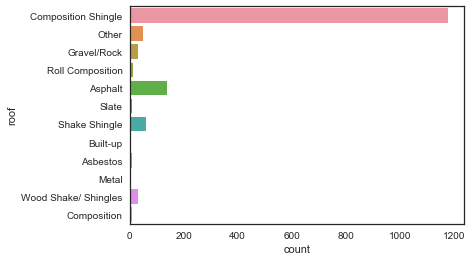

In [46]:
# Class distributions for 'roof'
sns.countplot(y='roof',data=df)

Looks okay! checking for mislabeled classes in 'exterior_walls'...

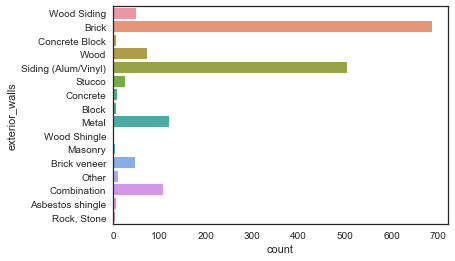

In [47]:
# Class distributions for 'exterior_walls'
sns.countplot(y='exterior_walls',data=df)

Let's fix these ...
* <code style="color:crimson">'Rock, Stone'</code> should be <code style="color:crimson">'Masonry'</code>
* <code style="color:crimson">'Concrete'</code> and <code style="color:crimson">'Block'</code> should both just be <code style="color:crimson">'Concrete Block'</code>

In [51]:
# 'Rock, Stone' should be 'Masonry'
df.exterior_walls.replace(['Rock, Stone'],'Masonry',inplace=True)

# 'Concrete' and 'Block' should be 'Concrete Block'
df.exterior_walls.replace(['Concrete','Block'],'Concrete Block',inplace=True)

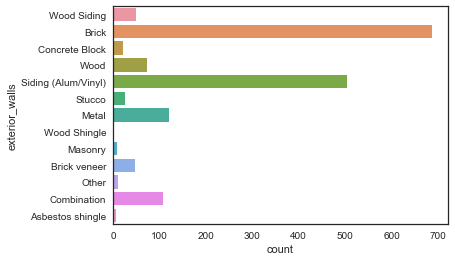

In [52]:

# Class distributions for 'exterior_walls'
sns.countplot(y='exterior_walls',data=df)

<h3> Remove unwanted outliers </h3>

Start with a box plot of your target variable, since that's the variable that you're actually trying to predict.

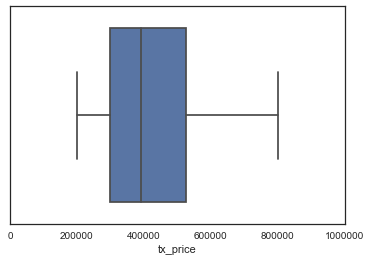

In [53]:
# Box plot of tx_price
sns.boxplot(df.tx_price)
plt.xlim(0, 1000000)
plt.show()

To show more information, make violin plot of transaction price.

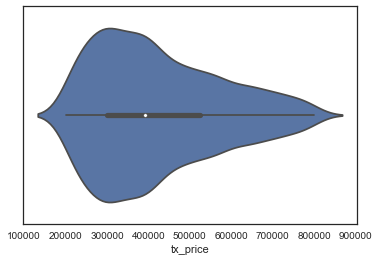

In [54]:
sns.violinplot(df.tx_price)
plt.show()

**Plot the violin plots for <code style="color:steelblue">'beds'</code>, <code style="color:steelblue">'sqft'</code>, and <code style="color:steelblue">'lot_size'</code>.**

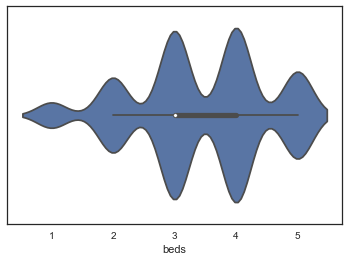

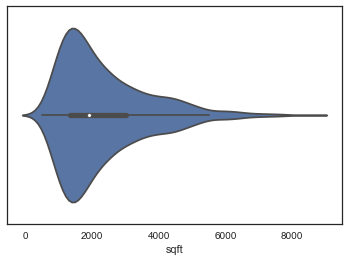

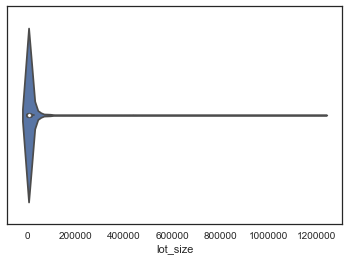

In [56]:
# Violin plot of beds
sns.violinplot(df.beds)
plt.show()

# Violin plot of sqft
sns.violinplot(df.sqft)
plt.show()

# Violin plot of lot_size
sns.violinplot(df.lot_size)
plt.show()

Among those three features, it looks like <code style="color:steelblue">lot_size</code> has a potential outlier! 
* Look at its long and skinny tail.
* Let's look at the largest 5 lot sizes just to confirm.


In [57]:
# Sort df.lot_size and display the top 5 samples
df.lot_size.sort_values(ascending=False).head(5)

102     1220551
1111     436471
1876     436035
1832     436035
1115     435600
Name: lot_size, dtype: int64

The largest property has a lot_size of 1,220,551 sqft. The next largest has a lot_size of only 436,471 sqft. Holy smokes!

Because it's unlikely the REIT will ever invest in properties with lots that large, and because it's the only one in the dataset, let's remove it so it doesn't interfere with our ability to model normal size properties.

In [58]:
# Remove lot_size outliers
df = df[df.lot_size <= 500000]

# print length of df
print(len(df))

1882


<h3> Time to address missing data </h3>

First, find and count the missing categorical data.

In [60]:
# Display number of missing values by feature (categorical)
df.select_dtypes(include=['object']).isnull().sum()

property_type       0
exterior_walls    223
roof              353
dtype: int64

In [61]:
# Fill missing categorical values
for column in df.select_dtypes(include=['object']):
    df[column] = df[column].fillna('Missing')


In [62]:
# Display number of missing values by feature (categorical)
df.select_dtypes(include=['object']).isnull().sum()

property_type     0
exterior_walls    0
roof              0
dtype: int64

Now, flagging and filling numeric data:

In [63]:
# Display number of missing values by feature (numeric)
df.select_dtypes(exclude=['object']).isnull().sum()

tx_price              0
beds                  0
baths                 0
sqft                  0
year_built            0
lot_size              0
basement              0
restaurants           0
groceries             0
nightlife             0
cafes                 0
shopping              0
arts_entertainment    0
beauty_spas           0
active_life           0
median_age            0
married               0
college_grad          0
property_tax          0
insurance             0
median_school         0
num_schools           0
tx_year               0
dtype: int64

Great, nothing to do here!

<h3> Saving the cleaned data frame </h3>

In [65]:
# Save cleaned dataframe to new file, index=None drops indices when saving
df.to_csv('cleaned_df.csv', index=None)

Now we will use this cleaned df going forward.

<h2> Feature Engineering </h2>

Importing the cleaned data frame...

In [67]:
# Load the cleaned dataframe
df = pd.read_csv('cleaned_df.csv')

In [68]:
# Verifying everything is okay
df.head()

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
0,295850,1,1,584,2013,0,Apartment / Condo / Townhouse,Wood Siding,Missing,0.0,107,9,30,19,89,6,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013
1,216500,1,1,612,1965,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,1.0,105,15,6,13,87,2,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006
2,279900,1,1,615,1963,0,Apartment / Condo / Townhouse,Wood Siding,Missing,0.0,183,13,31,30,101,10,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012
3,379900,1,1,618,2000,33541,Apartment / Condo / Townhouse,Wood Siding,Missing,0.0,198,9,38,25,127,11,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005
4,340000,1,1,634,1992,0,Apartment / Condo / Townhouse,Brick,Missing,0.0,149,7,22,20,83,10,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002


In [69]:
df.tail()

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
1877,385000,5,6,6381,2004,224334,Single-Family,Stucco,Composition Shingle,1.0,0,0,0,0,3,0,0,1,46.0,76.0,87.0,1250.0,381.0,10.0,3.0,2002
1878,690000,5,6,6501,1956,23086,Single-Family,Brick,Composition Shingle,1.0,45,7,5,7,41,3,61,11,42.0,73.0,61.0,1553.0,473.0,9.0,3.0,2015
1879,600000,5,6,7064,1995,217800,Single-Family,Metal,Composition Shingle,1.0,5,1,1,1,8,2,1,2,43.0,87.0,66.0,942.0,287.0,8.0,1.0,1999
1880,759900,5,6,7500,2006,8886,Single-Family,Siding (Alum/Vinyl),Asphalt,1.0,18,2,4,0,5,1,8,6,43.0,61.0,51.0,803.0,245.0,5.0,2.0,2009
1881,735000,5,6,7515,1958,10497,Single-Family,Brick,Composition Shingle,1.0,0,0,0,1,2,2,0,5,37.0,80.0,86.0,1459.0,444.0,9.0,3.0,2015


<h3> Create features based on domain knowledge </h3>

Create an indicator variable to flag properties with 2 beds and 2 baths and name it <code style="color:steelblue">'two_and_two'</code>.

In [71]:
# Create indicator variable for properties with 2 beds and 2 baths
df['two_and_two'] = ((df.beds == 2) & (df.baths == 2).astype(int))

Display the proportion of our observations that have 2 beds and 2 baths.

In [72]:
# Display percent of rows where two_and_two == 1
df.two_and_two.mean()

0.094580233793836344

Next, let's engineer an indicator feature for the housing market recession.

**Create a new feature called <code style="color:steelblue">'during_recession'</code> to indicate if a transaction falls between 2010 and 2013.**
1. Create a boolean mask to check if <code style="color:steelblue">tx_year >= 2010</code>
2. Create a boolean mask to check if <code style="color:steelblue">tx_year <= 2013</code>
3. Combine the two masks with an <code style="color:steelblue">&</code> operator
4. Convert the resulting series to type <code style="color:steelblue">int</code> to map from <code style="color:crimson">True/False</code> to <code style="color:crimson">1/0</code>

In [73]:
# Create indicator feature for transactions between 2010 and 2013, inclusive
df['during_recession'] = ((df.tx_year >= 2010) & (df.tx_year <= 2013).astype(int))

**What proportion of transactions in our dataset were during the recession?**

In [74]:
# Print percent of transactions where during_recession == 1
df.during_recession.mean()

0.26354941551540911

In the case where we're checking to see if a value falls between two numbers, there's a shortcut:

<pre style="color:steelblue">df.tx_year<strong>.between(2010, 2013)</strong>.astype(int)</pre>

This creates an indicator feature that should be equivalent to the one you created earlier from combining two boolean masks.

In [76]:
# Set variable a as the earlier indicator variable (combining two masks)
a = ((df.tx_year >= 2010)&(df.tx_year <= 2013)).astype(int)

# Set variable b as the new indicator variable (using "between")
b = df.tx_year.between(2010, 2013).astype(int)
# Are a and b equivalent?
all(a== b)

True

**Overwrite the <code style="color:steelblue">'during_recession'</code> feature you created at the beginning of the exercise with the new indicator feature created by <code style="color:steelblue">.between()</code>.**

In [77]:
# Create indicator feature for transactions between 2010 and 2013, inclusive
df['during_recession'] = df.tx_year.between(2010, 2013).astype(int)

Create <code style="color:steelblue">'property_age'</code> feature for the age of the property at the time of the transaction.

In [78]:
# Create a property age feature
df['property_age'] = df.tx_year - df.year_built

Do a quick sanity check. Print the minimum <code style="color:steelblue">'property_age'</code>.

In [79]:
# Should not be less than 0
print(df.property_age.min())

-8


Print the number of observations with <code style="color:steelblue">'property_age'</code> less than 0.

In [81]:
# Number of observations with 'property_age' < 0
print(sum(df.property_age < 0))

19


In [82]:
# Remove rows where property_age is less than 0
df = df[df.property_age >= 0]

# Print number of rows in remaining dataframe
print(len(df))

1863


Now, let's add another interaction feature. How about the number of quality schools nearby?

* Well, we do know the number of schools nearby (<code style="color:steelblue">'num_schools'</code>) 
* We also have their median quality score (<code style="color:steelblue">'median_schools'</code>)
* But what if it's the **interaction** of those two factors that's really important? 
* In other words, what if it's good to have many school options, but only if they are good?

We can represent this with an interaction feature.

<br>
**Create a new feature called <code style="color:steelblue">'school_score'</code> that is the product of <code style="color:steelblue">'num_schools'</code> and <code style="color:steelblue">'median_schools'</code>.**

In [83]:
# Create a school score feature that num_schools * median_school
df['school_score'] = df.num_schools*df.median_school

**Finally, display the median <code style="color:steelblue">'school_score'</code> from the dataset.**

In [85]:
# Display median school score
df['school_score'].median()

18.0

<h3> Grouping Sparse Classes </h3>

Let's begin by plotting the bar plots for <code style="color:steelblue">'exterior_walls'</code> again.

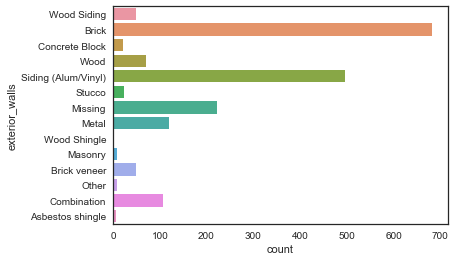

In [86]:
# Bar plot for exterior_walls
sns.countplot(y= 'exterior_walls', data=df)

Grouping <code style="color:crimson">'Wood Siding'</code>, <code style="color:crimson">'Wood Shingle'</code>, and <code style="color:crimson">'Wood'</code> together. Label all of them as <code style="color:crimson">'Wood'</code>.


In [87]:
# Group 'Wood Siding' and 'Wood Shingle' with 'Wood'
df.exterior_walls.replace(['Wood Siding','Wood Shingle'],'Wood',inplace=True)

Next, let's label <code style="color:crimson">'Stucco'</code>, <code style="color:crimson">'Other'</code>, <code style="color:crimson">'Asbestos shingle'</code>, <code style="color:crimson">'Concrete Block'</code>, and <code style="color:crimson">'Masonry'</code> as <code style="color:crimson;">'Other'</code>:

In [88]:
# List of classes to group
other_exterior_walls = ['Concrete Block','Stucco','Other','Masonry','Asbestos shingle']

# Group other classes into 'Other'
df.exterior_walls.replace(other_exterior_walls,'Other',inplace=True)

Finally, now that we've grouped together sparse classes, let's look at the bar plot for exterior walls again.

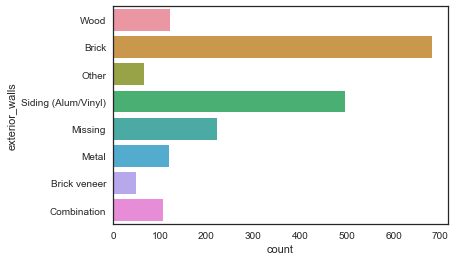

In [91]:
sns.countplot(y='exterior_walls',data=df)

Looks much better!! Let's do the same for roof:

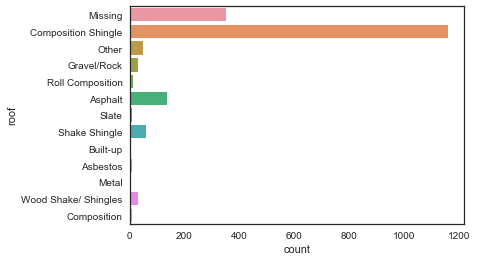

In [92]:
sns.countplot(y='roof',data=df)

**Group <code style="color:crimson">'Composition'</code> and <code style="color:crimson">'Wood Shake/ Shingles'</code> into the <code style="color:crimson">'Composition Shingle'</code> class.**

In [93]:
df.roof.replace(['Composition','Wood Shake/ Shingles'],'Composition Shingle',inplace=True)

Next, let's group remaining sparse classes into a single <code style="color:crimson">'Other'</code> class.

<br>
**Label <code style="color:crimson">'Other'</code>, <code style="color:crimson">'Gravel/Rock'</code>, <code style="color:crimson">'Roll Composition'</code>, <code style="color:crimson">'Slate'</code>, <code style="color:crimson">'Built-up'</code>, <code style="color:crimson">'Asbestos'</code>, and <code style="color:crimson">'Metal'</code> as <code style="color:crimson">'Other'</code>.**

In [94]:
# List of classes to group
classes_to_group = ['Other', 'Gravel/Rock', 'Roll Composition', 'Slate', 'Built-up', 'Asbestos','Metal']

# Group other classes into 'Other'
df.roof.replace(classes_to_group,'Other',inplace=True)

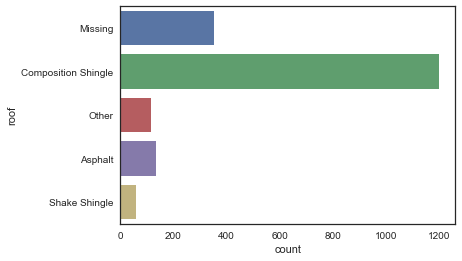

In [95]:
# Bar plot for roof
sns.countplot(y='roof',data=df)

Much nicer!!

<h3> Encoding Categorical Variables </h3>

Python machine learning algorithms cannot handle categorical features directly.Create a new dataframe with dummy variables for all of our categorical features.

In [97]:
# Create new dataframe with dummy features
df = pd.get_dummies(df, columns =['exterior_walls','roof','property_type'])

Display the first 5 rows of your dataframe to see these new features.

In [98]:
# First 5 rows of dataframe
df.head(5)

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year,two_and_two,during_recession,property_age,school_score,exterior_walls_Brick,exterior_walls_Brick veneer,exterior_walls_Combination,exterior_walls_Metal,exterior_walls_Missing,exterior_walls_Other,exterior_walls_Siding (Alum/Vinyl),exterior_walls_Wood,roof_Asphalt,roof_Composition Shingle,roof_Missing,roof_Other,roof_Shake Shingle,property_type_Apartment / Condo / Townhouse,property_type_Single-Family
0,295850,1,1,584,2013,0,0.0,107,9,30,19,89,6,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013,False,1,0,27.0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
1,216500,1,1,612,1965,0,1.0,105,15,6,13,87,2,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006,False,0,41,9.0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,279900,1,1,615,1963,0,0.0,183,13,31,30,101,10,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012,False,1,49,24.0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
3,379900,1,1,618,2000,33541,0.0,198,9,38,25,127,11,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005,False,0,5,27.0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
4,340000,1,1,634,1992,0,0.0,149,7,22,20,83,10,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002,False,0,10,27.0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0


<h2> Remove unused/redundant features </h2>

In [100]:
# Drop 'tx_year' and 'year_built' from the dataset
df = df.drop(['tx_year','year_built'], axis=1)

In [101]:
# Save analytical base table
df.to_csv('analytical_base_table.csv',index=None)

In [102]:
# Load cleaned dataset
df = pd.read_csv('analytical_base_table.csv')

print(df.shape)

(1863, 40)


<h2> Run Algorithms </h2>

<h3> Create input features and target variable </h3>

In [104]:
# Create separate object for target variable
y = df.tx_price

# Create separate object for input features
X = df.drop('tx_price',axis=1)

<h3> Create training and test sets </h3>

In [105]:
# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

Let's confirm we have the right number of observations in each subset.

<br>
**Next, run this code to confirm the size of each subset is correct.**

In [107]:
print( len(X_train), len(X_test), len(y_train), len(y_test) )

1490 373 1490 373


<h3> Standardize features </h3>

In [108]:
# Summary statistics of X_train
X_train.describe()

,beds,baths,sqft,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,during_recession,property_age,school_score,exterior_walls_Brick,exterior_walls_Brick veneer,exterior_walls_Combination,exterior_walls_Metal,exterior_walls_Missing,exterior_walls_Other,exterior_walls_Siding (Alum/Vinyl),exterior_walls_Wood,roof_Asphalt,roof_Composition Shingle,roof_Missing,roof_Other,roof_Shake Shingle,property_type_Apartment / Condo / Townhouse,property_type_Single-Family
count,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000
mean,3.434,2.579,2322.785,12746.660,0.879,39.496,4.389,5.005,5.186,39.561,3.362,22.909,15.770,38.509,69.471,65.013,464.266,139.610,6.510,2.779,0.266,24.344,17.940,0.360,0.024,0.059,0.066,0.119,0.038,0.268,0.066,0.073,0.644,0.189,0.060,0.034,0.419,0.581
std,1.073,0.930,1297.102,34805.545,0.327,46.986,4.498,8.442,7.443,52.335,4.694,25.724,17.999,6.615,19.865,17.093,227.250,71.511,1.975,0.517,0.442,21.209,6.452,0.480,0.154,0.236,0.248,0.324,0.190,0.443,0.248,0.260,0.479,0.392,0.238,0.180,0.494,0.494
min,1.000,1.000,500.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,22.000,11.000,5.000,88.000,30.000,1.000,1.000,0.000,0.000,3.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,3.000,2.000,1351.000,1542.000,1.000,6.000,1.000,0.000,0.000,6.000,0.000,4.000,4.000,33.000,59.000,53.250,321.000,94.000,5.000,3.000,0.000,6.000,12.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,4.000,3.000,1913.500,6183.000,1.000,21.000,3.000,2.000,3.000,20.000,2.000,15.000,10.000,38.000,74.000,66.000,426.000,125.000,7.000,3.000,0.000,20.000,18.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000
75%,4.000,3.000,3014.750,11761.000,1.000,56.000,7.000,6.000,6.000,50.000,5.000,35.000,21.000,43.000,84.000,78.000,572.000,169.000,8.000,3.000,1.000,38.000,24.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,1.000
max,5.000,6.000,7842.000,436471.000,1.000,266.000,24.000,53.000,47.000,340.000,35.000,177.000,94.000,69.000,100.000,100.000,4508.000,1374.000,10.000,4.000,1.000,114.000,30.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [109]:
# Standardize X_train
X_train_new = (X_train - X_train.mean())/X_train.std()

In [110]:
# Summary statistics of X_train_new
X_train_new.describe()

,beds,baths,sqft,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,two_and_two,during_recession,property_age,school_score,exterior_walls_Brick,exterior_walls_Brick veneer,exterior_walls_Combination,exterior_walls_Metal,exterior_walls_Missing,exterior_walls_Other,exterior_walls_Siding (Alum/Vinyl),exterior_walls_Wood,roof_Asphalt,roof_Composition Shingle,roof_Missing,roof_Other,roof_Shake Shingle,property_type_Apartment / Condo / Townhouse,property_type_Single-Family
count,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000
mean,-0.000,-0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.000,0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-2.269,-1.697,-1.405,-0.366,-2.688,-0.841,-0.976,-0.593,-0.697,-0.756,-0.716,-0.891,-0.876,-2.496,-2.943,-3.511,-1.656,-1.533,-2.790,-3.440,-0.319,-0.601,-1.148,-2.316,-0.749,-0.157,-0.250,-0.265,-0.368,-0.198,-0.606,-0.265,-0.281,-1.343,-0.483,-0.253,-0.186,-0.850,-1.176
25%,-0.405,-0.622,-0.749,-0.322,0.372,-0.713,-0.753,-0.593,-0.697,-0.641,-0.716,-0.735,-0.654,-0.833,-0.527,-0.688,-0.630,-0.638,-0.765,0.427,-0.319,-0.601,-0.865,-0.921,-0.749,-0.157,-0.250,-0.265,-0.368,-0.198,-0.606,-0.265,-0.281,-1.343,-0.483,-0.253,-0.186,-0.850,-1.176
50%,0.527,0.452,-0.316,-0.189,0.372,-0.394,-0.309,-0.356,-0.294,-0.374,-0.290,-0.307,-0.321,-0.077,0.228,0.058,-0.168,-0.204,0.248,0.427,-0.319,-0.601,-0.205,0.009,-0.749,-0.157,-0.250,-0.265,-0.368,-0.198,-0.606,-0.265,-0.281,0.744,-0.483,-0.253,-0.186,-0.850,0.850
75%,0.527,0.452,0.533,-0.028,0.372,0.351,0.581,0.118,0.109,0.199,0.349,0.470,0.291,0.679,0.731,0.760,0.474,0.411,0.754,0.427,-0.319,1.662,0.644,0.939,1.334,-0.157,-0.250,-0.265,-0.368,-0.198,1.650,-0.265,-0.281,0.744,-0.483,-0.253,-0.186,1.176,0.850
max,1.459,3.676,4.255,12.174,0.372,4.821,4.360,5.685,5.618,5.741,6.741,5.990,4.346,4.609,1.537,2.047,17.794,17.262,1.767,2.360,3.129,1.662,4.227,1.869,1.334,6.353,3.990,3.768,2.714,5.059,1.650,3.768,3.558,0.744,2.069,3.943,5.365,1.176,0.850


Great, looks like this works. We perform standardizing using the StandardScaler now.

<h3> Building Model Pipelines </h3>

In [114]:
# Create pipelines dictionary
pipelines = {
    'lasso' : make_pipeline(StandardScaler(),Lasso(random_state=123)),
    'ridge' : make_pipeline(StandardScaler(),Ridge(random_state=123))
}
pipelines['enet'] = make_pipeline(StandardScaler(), ElasticNet(random_state=123))
# Add a pipeline for 'rf'
pipelines['rf'] = make_pipeline(StandardScaler(),RandomForestRegressor(random_state=123))

# Add a pipeline for 'gb'
pipelines['gb'] = make_pipeline(StandardScaler(),GradientBoostingRegressor(random_state=123))

Let's make sure our dictionary has pipelines for each of our algorithms.

<br>
**Run this code to confirm that you have all 5 algorithms, each part of a pipeline.**

In [116]:
# Check that we have all 5 algorithms, and that they are all pipelines
for key, value in pipelines.items():
    print( key, type(value) )

lasso <class 'sklearn.pipeline.Pipeline'>
ridge <class 'sklearn.pipeline.Pipeline'>
enet <class 'sklearn.pipeline.Pipeline'>
rf <class 'sklearn.pipeline.Pipeline'>
gb <class 'sklearn.pipeline.Pipeline'>


<h3> Declare Hyperparamaters to tune </h3>

In [117]:
# List tuneable hyperparameters of our Lasso pipeline
pipelines['lasso'].get_params()

{'lasso': Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
    normalize=False, positive=False, precompute=False, random_state=123,
    selection='cyclic', tol=0.0001, warm_start=False),
 'lasso__alpha': 1.0,
 'lasso__copy_X': True,
 'lasso__fit_intercept': True,
 'lasso__max_iter': 1000,
 'lasso__normalize': False,
 'lasso__positive': False,
 'lasso__precompute': False,
 'lasso__random_state': 123,
 'lasso__selection': 'cyclic',
 'lasso__tol': 0.0001,
 'lasso__warm_start': False,
 'standardscaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'steps': [('standardscaler',
   StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('lasso', Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=123,
      selection='cyclic', tol=0.0001, warm_start=False))]}

Next, declare hyperparameters to tune for Lasso and Ridge regression.
* Try values between 0.001 and 10 for <code style="color:steelblue">alpha</code>.

In [118]:
# Lasso hyperparameters
lasso_hyperparameters = {
    'lasso__alpha' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]
}

# Ridge hyperparameters
ridge_hyperparameters = {
    'ridge__alpha' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]
}


In [119]:
# Elastic Net hyperparameters
pipelines['enet'].get_params()
enet_hyperparameters = {
    'elasticnet__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],
    'elasticnet__l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
}

In [120]:
# Random forest hyperparameters
rf_hyperparameters = {
    'randomforestregressor__n_estimators': [100, 200],
    'randomforestregressor__max_features': ['auto', 'sqrt', 0.33]
}

In [121]:
# Boosted tree hyperparameters
gb_hyperparameters = {
    'gradientboostingregressor__n_estimators': [100, 200],
    'gradientboostingregressor__learning_rate': [0.05, 0.1, 0.2],
    'gradientboostingregressor__max_depth': [1, 3, 5]
}

Now that we have all of our hyperparameters declared, let's store them in a dictionary for ease of access.

In [122]:
# Create hyperparameters dictionary
# pipelines.keys()
hyperparameters = {
    'lasso': lasso_hyperparameters,
    'ridge': ridge_hyperparameters,
    'enet' : enet_hyperparameters,
    'rf': rf_hyperparameters,
    'gb': gb_hyperparameters
}

**Finally, run this code to check that <code style="color:steelblue">hyperparameters</code> is set up correctly.**

In [124]:
for key in ['enet', 'gb', 'ridge', 'rf', 'lasso']:
    if key in hyperparameters:
        if type(hyperparameters[key]) is dict:
            print( key, 'was found in hyperparameters, and it is a grid.' )
        else:
            print( key, 'was found in hyperparameters, but it is not a grid.' )
    else:
        print( key, 'was not found in hyperparameters')

enet was found in hyperparameters, and it is a grid.
gb was found in hyperparameters, and it is a grid.
ridge was found in hyperparameters, and it is a grid.
rf was found in hyperparameters, and it is a grid.
lasso was found in hyperparameters, and it is a grid.


<h3>Fit and tune models with cross-validation </h3>

In [126]:
# Create empty dictionary called fitted_models
fitted_models = {}

# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, pipeline in pipelines.items():
    # Create cross-validation object from pipeline and hyperparameters
    model = GridSearchCV(pipeline, hyperparameters[name], cv = 10, n_jobs = -1)

    # Fit model on X_train, y_train
    model.fit(X_train, y_train)

    # Store model in fitted_models[name] 
    fitted_models[name] = model
    
    # Print '{name} has been fitted'
    print(name, 'has been fitted.')

/Users/raghav/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/raghav/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/raghav/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/raghav/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not co

/Users/raghav/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/raghav/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/raghav/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/raghav/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not co

/Users/raghav/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/raghav/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/raghav/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/raghav/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not co

lasso has been fitted.
ridge has been fitted.


/Users/raghav/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/raghav/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/raghav/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/raghav/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not co

/Users/raghav/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/raghav/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/raghav/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/raghav/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not co

/Users/raghav/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/raghav/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/raghav/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/raghav/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not co

/Users/raghav/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/raghav/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/raghav/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/raghav/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not co

/Users/raghav/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/raghav/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/raghav/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/raghav/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not co

enet has been fitted.
rf has been fitted.
gb has been fitted.


<br>
**Run this code to check that the models are of the correct type.**

In [127]:
# Check that we have 5 cross-validation objects
for key, value in fitted_models.items():
    print( key, type(value) )

lasso <class 'sklearn.model_selection._search.GridSearchCV'>
ridge <class 'sklearn.model_selection._search.GridSearchCV'>
enet <class 'sklearn.model_selection._search.GridSearchCV'>
rf <class 'sklearn.model_selection._search.GridSearchCV'>
gb <class 'sklearn.model_selection._search.GridSearchCV'>


<br>
**Finally, run this code to check that the models have been fitted correctly.**

In [128]:
from sklearn.exceptions import NotFittedError

for name, model in fitted_models.items():
    try:
        pred = model.predict(X_test)
        print(name, 'has been fitted.')
    except NotFittedError as e:
        print(repr(e))

lasso has been fitted.
ridge has been fitted.
enet has been fitted.
rf has been fitted.
gb has been fitted.


Nice. Now we're ready to evaluate how our models performed!

<h3> Evaluate models and select a winner </h3>

Finally, it's time to evaluate our models and pick the best one.

<br>
Let's display the holdout $R^2$ score for each fitted model.

In [130]:
# Display best_score_ for each fitted model
for name, model in fitted_models.items():
    print(name, model.best_score_)

lasso 0.308627508594
ridge 0.316611158599
enet 0.342874628664
rf 0.481596734789
gb 0.486972058574


Finally, let's see how the fitted models perform on our test set!

In [132]:
# Code here
for name, model in fitted_models.items():
    print(name)
    print("--------")
    pred = model.predict(X_test)
    print('R^2:',r2_score(y_test, pred))
    print('MAE:',mean_absolute_error(y_test, pred))
    print()

lasso
--------
R^2: 0.408886247167
MAE: 85035.5424654

ridge
--------
R^2: 0.409339647633
MAE: 84978.0356481

enet
--------
R^2: 0.405245137312
MAE: 86298.6372531

rf
--------
R^2: 0.572250974291
MAE: 67962.7578016

gb
--------
R^2: 0.541095182282
MAE: 70601.6066494



Random forest has the highest $R^2$ and lowest MAE.

**Finally, let's plot the performance of the winning model on the test set. The code below.**
* first plots a scatter plot.
* Then, plots predicted transaction price on the X-axis.
* Finally, plots actual transaction price on the y-axis.

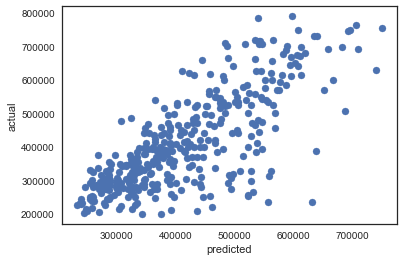

In [133]:
gb_pred = fitted_models['rf'].predict(X_test)
plt.scatter(gb_pred, y_test)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

Note that the points are mostly scattered around the diagonal.

The winning values for our hyperparameters are...

In [134]:
fitted_models['rf'].best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomforestregressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=123,
           verbose=0, warm_start=False))])

The winning values for our hyperparameters are:
* <code style="color:steelblue">n_estimators: <span style="color:crimson">200</span></code>
* <code style="color:steelblue">max_features : <span style="color:crimson">'auto'</span></code>

In [137]:
with open('final_model.pkl', 'wb') as f:
    pickle.dump(fitted_models['rf'].best_estimator_, f)

That's it!